## Der Zerfall des Bierschaums

![](../images/weizenbier.jpg)

Wenn wir ein Weizenbier länger stehen lassen, baut sich die schöne Schaumkrone ab. Aber wie schnell eigentlich?

### Experimenteller Aufbau

Messen wir es einfach nach! Wir benutzen ein Messbecher, Wasser und einen wasserfesten Marker um ein Weizenglas mit Eichstrichen zu verwesen. Wir schütten ein Bier ein, so dass sehr viel Schaum entsteht und notieren uns - so gut es eben geht - den unteren und oberen Stand des Schaumes zu unterschiedlichen Zeitpunkten. Die Differenz ist dann das Bierschaumvolumen zum jeweiligen Zeitpunkt.

| $t$ [s] | Oberer Messwert [$l$] | Unterer Messwert [$l$] | $V$ [$l$] |
| -- | -- | -- | -- |
| 0  | 0.020 | 0.600 | 0.580 |
| 12 | 0.050 | 0.600 | 0.550 |
| 51 | 0.125 | 0.550 | 0.425  |
| 96 | 0.150 | 0.500 | 0.350  |
| 164 | 0.170 | 0.450 | 0.280  |
| 220 | 0.180 | 0.400 | 0.220  |
| 270 | 0.180 | 0.375 | 0.195  |
| 345 | 0.185 | 0.325 | 0.140  |
| 432 | 0.190 | 0.275 | 0.085  |
| 490 | 0.190 | 0.250 | 0.060  |
| 570 | 0.190 | 0.225 | 0.035  |

Die Genauigkeit der Messung sei mal dahin gestellt, es reicht zumindest aus um einen Trend zu erkennen: Der Schaum baut sich anfänglich schneller ab als später, wenn nicht mehr viel Schaum da ist. Wenn wir von einem Messfehler von ca. $0.02$ Litern und ca. $2$ Sekunden ausgehen, ergibt sich folgendes Bild

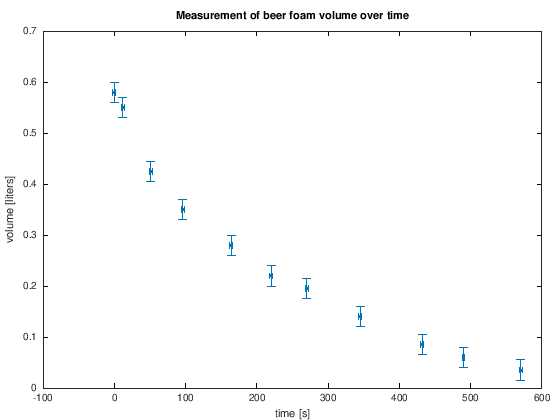

In [51]:
% measurement results

t = [0 12 51 96 164 220 270 345 432 490 570];
U = [0.02 0.05 0.125 0.15 0.17 0.18 0.18 0.185 0.19 0.19 0.19];
O = [0.6 0.6 0.55 0.5 0.45 0.4 0.375 0.325 0.275 0.25 0.225];
V = O-U;

% approximate measurement errors:
t_err = 2;
V_err = 0.02;

errorbar(t, V, t_err, V_err, '~>.')
title('Measurement of beer foam volume over time')
xlabel('time [s]')
ylabel('volume [liters]')

### Modellbeschreibung

Der Schaum besteht aus vielen kleinen Bläschen, die nach und nach platzen. Je mehr Schaum da ist, d.h. je mehr Bläschen da sind, desto mehr Bläschen platzen auch. Ist der Schaum schon fast komplett abgebaut, bleiben insgesamt weniger Bläschen die platzen können, und die Zerfallsrate des Bierschaumes sinkt entsprechend. Mathematisch ausgedrückt ist die zeitliche Änderung $\dot{V}$ des Schaumvolumens proportional zur Menge des Schaumvolumens selbst, d.h. es gilt

$$ \dot{V} = a \cdot V, $$

mit einer uns unbekannten Proportionalitätskonstante $a \in \mathbb{R}$. Diese Differentialgleichung kommt sehr häufig vor, denn sie beschreibt exponentielles Wachstum, bzw. - je nach Vorzeichen von $a$ - exponentiellen Zerfall. Wir machen also, wie gewohnt, einen Ansatz 

$$ V(t) = b \cdot e^{c \cdot t}.$$

Setzen wir $V(t)$ in die Differentialgleichung $ \dot{V} = a \cdot V $ ein, 

$$ c b \cdot e^{c \cdot t} = a \cdot b e^{c \cdot t}, $$

stellen wir fest, dass unser Ansatz eine valide Lösung der Differentialgleichung ist, unter der Voraussetzung, dass $c = a$ gilt.

$$ V(t) = b \cdot e^{a \cdot t}. $$

Ok, nun haben wir einerseits Messwerte und andererseits ein mathematisches Modell mit unbekannten Parametern $a$ und $b$. $b$ muss offensichtlich der y-Achsenabschnitt sein, da $V(0)=b \cdot e^0 = b$, den kennen wir aus den Messwerten. Aber was, wenn ausgerechnet die erste Messung mit Messfehlern behaftet ist? Abgesehen, davon haben wir auch dann noch Schwierigkeiten händisch die Zerfallsrate $a$ zu raten. Für $a=-0.001 \frac{1}{\text{s}}$ und $b=0.58$ $l$ ergibt sich folgender Verlauf.

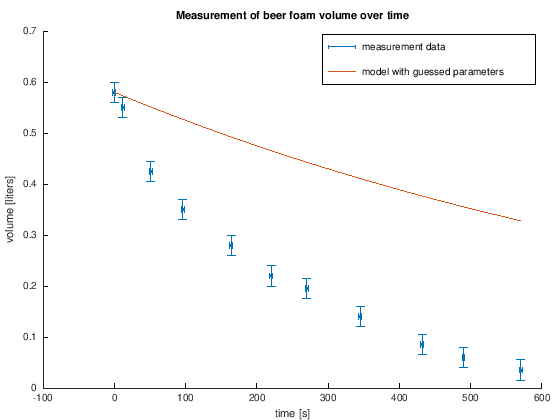

In [52]:
hold on

% plot measurement
h_meas = errorbar(t, V, t_err, V_err, '~>.');
title('Measurement of beer foam volume over time')
xlabel('time [s]')
ylabel('volume [liters]')

% plot model
a = -0.001;
b = 0.58;
tfine = linspace(t(1),t(end),100);
yfine = b*exp(a*tfine);
h_model = plot(tfine, yfine);

legend([h_meas, h_model],{'measurement data', 'model with guessed parameters'})

 Wir können immer noch keine quantifizierbare Aussage darüber treffen, wie schnell das Bier sich abbaut. 
 
Wie können wir $a$ und $b$ so bestimmen, dass das Modell zu unseren Messwerten passt? Wenn wir das wüssten, könnten wir auf Grundlage der Modellgleichung Vorhersagen treffen.

## Die Methode der kleinsten Quadrate

Die Methode der kleinsten Quadrate ist eine weit verbreitete Methode zur Modellkalibrierung. Mit ihr können noch unbekannte Parameter $p_1,...,p_n$ eines Modells $y = f(p_1,...,p_n,t)$ so angepasst werden, dass es vorher ermittelte experimentelle Daten $(t_1,y_1),...,(t_m, y_m)$ möglichst gut wiederspiegelt.

### Die Grundidee

Wir formulieren ein Minimierungsproblem: Für alle Messpunkte $t_i$ soll die Differenz $y_i - f(p_1,...,p_n,t_i)$ betragsmäßig klein werden.

Für die Formulierung stehen verschiedene Ansätze zur Verfügung. Man könnte einfach den Mittelwert der betragsmäßigen Differenzen über alle Messpunkte minimieren:

$$ \min_{p_1,...,p_n} G(p_1,...,p_n) = \frac{1}{m} \sum_{i=1}^m |y_i - f(p_1,...,p_n,t_i)|  $$

Wenn die Funktion $G$ minimal werden soll, muss die Ableitung von $G$ nach allen Parametern verschwinden, 

$$ \frac{\partial G}{\partial p_1} = ... = \frac{\partial G}{\partial p_n} = 0. $$

Spätestens jetzt haben wir ein Problem: Wir müssen die Betragsfunktion, die in $G$ verwendet wird ableiten. 

Als Alternative nehmen wir nicht den Betrag der Differenzen, sondern einfach das Quadrat. Auf diese Weise werden positive sowie negative Differenzen gleich berücksichtigt. Es hat auch noch den angenehmen Nebeneffekt, dass große Abweichungen zwischen Modell und Messung größer bestraft werden als kleine Abweichungen:

$$ \min_{p_1,...,p_n} G(p_1,...,p_n) = \frac{1}{m} \sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))^2  $$

Das Minimierungsproblem lösen wir, indem wir die Bedingung aufstellen, dass alle Ableitungen von $G$ nach den Parametern null sein sollen und nach den Parametern auflösen. Die partiellen Ableitungen bestimmen wir mit der Kettenregel:

$$
\boldsymbol{0} = 
\begin{bmatrix}
0 \\ \vdots \\ 0
\end{bmatrix} = F(\mathbf{p}) =
\begin{bmatrix} 
\frac{\partial G}{\partial p_1}(p_1,...,p_n)  \\
\vdots \\
\frac{\partial G}{\partial p_n}(p_1,...,p_n)
\end{bmatrix}
=
\begin{bmatrix}
-\frac{2}{m}\sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))\cdot \frac{\partial f}{\partial p_1}(p_1,...,p_n) \\
\vdots \\
-\frac{2}{m}\sum_{i=1}^m (y_i - f(p_1,...,p_n,t_i))\cdot \frac{\partial f}{\partial p_n}(p_1,...,p_n) \\
\end{bmatrix}
$$

### Anwendung auf den Bierschaum

Im Falle des Bierschaumes gilt $p_1 = a, p_2 = b$ und

$$ f(a,b,t) = b\cdot e^{a \cdot t}. $$

Das nichtlineare Gleichungssystem, das gelöst werden muss lautet also

$$ 
\boldsymbol{0} = F(a,b) = 
\begin{bmatrix}
\frac{\partial G}{\partial a} (a,b) \\
\frac{\partial G}{\partial b} (a,b) 
\end{bmatrix} = 
\begin{bmatrix}
-\frac{2}{m}\sum_{i=1}^m (V_i - b \cdot e^{a \cdot t_i})\cdot  t_i \cdot b \cdot e^{a \cdot t_i} \\
-\frac{2}{m}\sum_{i=1}^m (V_i - b \cdot e^{a \cdot t_i}) \cdot e^{a \cdot t_i}
\end{bmatrix}
$$

### Aufgabe 1: Das nichtlineare Gleichungssystem

Schreiben Sie eine Matlab-Funktion, die die nichtlineare Gleichung $F$ für beliebige Parameter $\mathbf{p}=[a,b]^T \in \mathbb{R}^2$ und Messwerte $t \in \mathbb{R}^m$, $V \in \mathbb{R}^m$ auswertet:

In [1]:
%%file F.m
function e = F(p,t,V)
% define the nonlinear system of equations that need to be solved within the least squares fit
% of the beer froth experiment
%
% p = [a,b]' is a vector of the model parameters
%
% t and V are vectors containing the experimental data

% PUT YOUR CODE HERE

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/04_nichtlineare_gleichungen/F.m'.


## Das Newton-Verfahren

Aus der Vorlesung kennen Sie das Newton-Verfahren zum Lösen nichtlinearer Gleichungssysteme. Angefangen mit einem Startwert $\mathbf{p}^{(0)}$ muss in jeder Iteration ein lineares Gleichungssystem gelöst werden:

$$
\begin{align}
 J_F(\mathbf{p}^{(i)}) \Delta \mathbf{p}^{(i+1)} &= - F(\mathbf{p}^{(i)}), \notag \\
 \mathbf{p}^{(i+1)} &= \mathbf{p}^{(i)} + \Delta \mathbf{p}^{(i+1)}, \notag
\end{align}
$$

$i=1,2,3,...$

Um die Jacobi-Matrix $J_F(\mathbf{p}^{(i)})$ in jeder Iteration zu bestimmen, müssen wir die partiellen Ableitungen von $F$ anch $p_1 = a$ und $p_2=b$ ausrechnen. Theoretisch kann man das in unserem Fall noch analytisch machen. Einfacher ist es aber, die Jacobi-Matrix mittels finiter Differenzen zu approximieren. Dadurch verlieren wir zwar an Genauigkeit. Aber wir können unser Verfahren so auch auf komplexere Modellgleichungen anwenden, die sich nicht mehr so einfach ableiten lassen.

### Aufgabe 2: Approximation der Jacobi-Matrix

Schreiben Sie eine Matlab-Funktion, die die Jacobimatrix $J_F(\mathbf{x})$ für eine beliebige Funktion $F:\mathbb{R}^n \to \mathbb{R}^m$ mit finiten Differenzen approximiert:

In [2]:
%%file jacobian.m
function J = jacobian(F,x)
% J = jacobian(F,x) returns the (m x n) Jacobian matrix of F evaluated at x
%
%   |  dF1/dx1 ... dF1/dxn |
%   |     .           .    |
%   |  dFm/dx1 ... dFm/dxn |
%
% It uses finite difference approximations. x must be a (n,1)-column vector and F must be a function
% taking an (n,1)-vector as an input. m is deduced from F.

% PUT YOUR CODE HERE

Created file '/mnt/c/Users/jan/Documents/Vorlesungen/Modellbildung-und-Simulation/content/04_nichtlineare_gleichungen/jacobian.m'.


Mit dem folgenden unit test können Sie ihre Funktion testen:

In [ ]:
moxunit_runtests test_jacobian

Es gilt `F(p,t,V)` $= J_G(\mathbf{p})$ mit

$$
G(\mathbf{p}) = \frac{1}{m} \sum_{i=1}^m (y_i - f(\mathbf{p},t_i))^2.
$$

Einerseits haben Sie in Aufgabe 1 eine Funktion geschrieben, die `F` berechnet, andererseits können Sie mit ihrer Funktion aus Aufgabe 2 die Jacobi-Matrix $J_G(\mathbf{p})\in \mathbb{R}^{1 \times n}$ mit finiten Differenzen approximieren. Vergleichen Sie die beiden Ergebnisse für verschiedene $\mathbf{p}$. In welcher Größenordung befindet sich in etwa der relative Fehler der Funktion `jacobian` für ihr Problem? 

### Aufgabe 3: Parameterbestimmung

Schreiben Sie eine Matlab-Funktion, die das Newton-Verfahren implementiert. Verwenden Sie dazu ihre Funktion `jacobian` aus Aufgabe 2.

In [5]:
%%file newton.m
function z = newton(func,z0,tol,maxit)
% z = newton(F,z0,tol,maxit) solves the nonlinear system 0=func(z)
%
% inputs:
%   func    a handle to the nonlinear function
%   z0      initial guess for the Newton method
%   atol    absolute tolerance
%   maxit   maximum number of Newton iterations

% YOUR CODE HERE

Created file '/mnt/c/Users/jan/Documents/Vorlesungen/Modellbildung-und-Simulation/content/04_nichtlineare_gleichungen/newton.m'.


Mit dem folgenden unit test können Sie ihre Funktion testen:

In [ ]:
moxunit_runtests test_newton

 - Wenden Sie das Newton-Verfahren auf die Funkton `func = @(p) F(p,t,V)` an um das ursprüngliche nichtlineare Gleichungssystem zu lösen. Wählen Sie angemessene Werte für die Toleranz und die maximale Anzahl an Iterationen. Wie lauten die Parameter $a$ und $b$ ihrer Modellfunktion? 
 - Vergleichen Sie Ihr Ergebnis mit dem Ergebnis der Matlab-Funktion `fzero`.
 - Erstellen Sie ein Plot mit den Messwerten, sowie der kalibrierten Modellfunktion $V(t) = b \cdot e^{a \cdot t}$.
 - Wie lautet die Halbwertzeit des Bierschaumes?

In [53]:
% SPACE FOR SOLUTION


## Optimierungsverfahren

Grundlage der Methode der kleinsten Quadrate ist ein Minimierungsproblem. Wir haben gesehen, dass sich das Minimum einer Funktion $G: \mathbb{R}^n \to \mathbb{R}$ bestimmen lässt, in dem das nichtlineare Gleichungssystem 

$$
  \boldsymbol{0} = J_G(\mathbf{p})^T = 
  \begin{bmatrix}  
  \frac{\partial G}{\partial p_1}(\mathbf{p}) \\
  \vdots \\
  \frac{\partial G}{\partial p_n}(\mathbf{p})
  \end{bmatrix}
$$

mit dem Newton-Verfahren nach $\mathbf{p}$ gelöst wird. Die Iterationsvorschrift lautet

$$
\begin{align}
J_{J_G}(\mathbf{p}^{(i)}) \Delta \mathbf{p}^{(i+1)} &= - J_G(\mathbf{p}^{(i)})^T \notag \\
\mathbf{p}^{(i+1)} &= \mathbf{p}^{(i)} + \Delta \mathbf{p}^{(i)}, \notag
\end{align}
$$

$i=1,2,3,...$ Hierbei ist $J_G(\mathbf{p}^{(i)})^T \in \mathbb{R}^n$ die Jacobimatrix von $G$. Die Jacobimatrix von $J_G(\mathbf{p}^{(i)})^T$ wiederum ist $J_{J_G}(\mathbf{p}^{(i)}) \in \mathbb{R}^{n \times n}$. Sie wird auch als *Hessematrix von $G$* an der Stelle $\mathbf{p}^{(i)}$ bezeichnet und beinhaltet die zweiten Ableitung der Funktion $G$:

$$
Hess_G(\mathbf{p}) = J_{J_G}(\mathbf{p}) =
\begin{bmatrix}
\frac{\partial}{\partial p_0} \frac{\partial G}{\partial p_0}(\mathbf{p}) & \cdots & \frac{\partial}{\partial p_n} \frac{\partial G}{\partial p_0}(\mathbf{p}) \\
\vdots & \ddots & \vdots \\
\frac{\partial}{\partial p_0} \frac{\partial G}{\partial p_n}(\mathbf{p}) & \cdots & \frac{\partial}{\partial p_n} \frac{\partial G}{\partial p_n}(\mathbf{p})
\end{bmatrix}
$$

Zusammenfassend kann ein Minimierungsproblem also gelöst werden, indem es auf ein nichtlineares Gleichungssystem zurückgeführt wird. Dieses wiederum kann mit Hilfe des Newtonverfahren gelöst werden. In jeder Iteration des Newtonverfahrens muss ein lineares Gleichungssystem gelöst werden.

### Aufgabe 4: Algorithmus zur Minimierung einer Funktion

Schreiben Sie eine neue Funktion `minimize(func,x0,tol,maxit)` auf Grundlage ihrer Implementierung für das Newtonverfahren, die eine beliebige Funktion `func`$: \mathbb{R}^n \to \mathbb{R}$ minimiert. Verwenden Sie ihre Funktion `jacobian` um die Hessematrix sowie die rechte Seite in jedem Funktionsaufruf zu konstruieren.

 - Lösen Sie das ursprüngliche Minimierungsproblem mit ihrer neuen Funktion und vergleichen Sie das Ergebnis mit ihrem Ergebnis aus Aufgabe 3 sowie dem Resultat der Matlab-Funktion `fminsearch`.
 - Wo sind die Grenzen ihres Algorithmus? Gibt es mögliche Fehlerquelen, die Nutzer ihrer Funktion beachten sollten?

In [54]:
%%file minimize.m

%SPACE FOR SOLUTION

Created file '/mnt/c/Users/jan/Documents/Vorlesungen/Modellbildung-und-Simulation/content/04_nichtlineare_gleichungen/minimize.m'.


In [55]:
% SPACE FOR SCRIPT SOLUTION


## Literatur

 - Leike, A. (2002). [Demonstration of the Exponential Decay Law Using Beer Froth](https://www.tf.uni-kiel.de/matwis/amat/iss/kap_2/articles/beer_article.pdf); *European Journal of Physics, 23, 21-26.*
 - Theißen, H. (2009). [Mythos Bierschaumzerfall - Ein Analogon für den radioaktiven Zerfall?](http://www.phydid.de/index.php/phydid/article/download/87/85); *PhyDid A - Physik und Didaktik in Schule und Hochschule, 2(9), 49 - 57.*